# Delhivery - Courier Dataset EDA

## About

- Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.
- The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## How can you help here?

The company wants to understand and process the data coming out of data engineering pipelines:-

- Clean, sanitize and manipulate data to get useful features out of raw fields
- Make sense out of the raw data and help the data science team to build forecasting models on it

# Setup

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from scipy import stats

## Dataset

In [3]:
df = pd.read_csv("./delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


**`Column Description`**:-

- **data** - tells whether the data is testing or training data
- **trip_creation_time** – Timestamp of trip creation
- **route_schedule_uuid** – Unique Id for a particular route schedule
- **route_type** – Transportation type
- **FTL** – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- **Carting**: Handling system consisting of small vehicles (carts)
- **trip_uuid** - Unique ID given to a particular trip (A trip may include different source and destination centers)
- **source_center** - Source ID of trip origin
- **source_name** - Source Name of trip origin
- **destination_cente** – Destination ID
- **destination_name** – Destination Name
- **od_start_time** – Trip start time
- **od_end_time** – Trip end time
- **start_scan_to_end_scan** – Time taken to deliver from source to destination
- **is_cutoff** – Unknown field
- **cutoff_factor** – Unknown field
- **cutoff_timestamp** – Unknown field
- **actual_distance_to_destination** – Distance in Kms between source and destination warehouse
- **actual_time** – Actual time taken to complete the delivery (Cumulative)
- **osrm_time** – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- **osrm_distance** – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- **factor** – Unknown field
- **segment_actual_time** – This is a segment time. Time taken by the subset of the package delivery
- **segment_osrm_time** – This is the OSRM segment time. Time taken by the subset of the package delivery
- **segment_osrm_distance** – This is the OSRM distance. Distance covered by subset of the package delivery
- **segment_factor** – Unknown field


*Dropping Unknown Columns*

In [4]:
unknown_columns = ["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "segment_factor"]
df.drop(columns=unknown_columns, inplace=True)

In [5]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

# Data Preprocessing

## Basic Checks

In [6]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [7]:
df.shape

(144867, 19)

In [8]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

*Convert dtype of time columns to pandas.Datetime format*

In [10]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])

## Compressing dataset so that a trip has single row in the dataset

In [11]:
df[["trip_uuid", "source_name", "destination_name"]].head(20)

,trip_uuid,source_name,destination_name
0,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
1,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
2,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
3,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
4,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
5,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat)
6,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat)
7,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat)
8,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat)
9,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat)


Note:-

1. There are more than 1 rows (typically 10 rows) of data for one single trip
2. For the first few segments of a trip - source_name is the pickup location, destination_name is the central-hub of that trip.
3. Similarly for the last few segments of a trip - central-hub of the trip is source and delivery location is the destination.

What to do:-
1. These outcomes suggest that for each trip data is collected at minute level.
2. So there is a need to compress this amount of data to a single row.

### **Grouping data based on the segment key**
- `segment_key = trip_uuid + source_center + destination_center`
- This key will help to compress multiple rows to a single row. i.e., first half and second half of a trip separately.


In [12]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

In [13]:
segment_agg_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',

    }

In [14]:
segment = df.groupby('segment_key').agg(segment_agg_dict).reset_index(drop=True) # compressing 5 rows to 1 row
segment = segment.sort_values(by=['trip_uuid', 'od_end_time'], ascending= True).reset_index(drop=True) # order by trip_uuid and od_end_time
segment.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
2,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
3,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
4,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,2227.5270,1710.0


In [15]:
segment.loc[segment['trip_uuid'] == "trip-153671041653548748"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0


In [16]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            26368 non-null  object        
 1   trip_creation_time              26368 non-null  datetime64[ns]
 2   route_schedule_uuid             26368 non-null  object        
 3   route_type                      26368 non-null  object        
 4   trip_uuid                       26368 non-null  object        
 5   source_center                   26368 non-null  object        
 6   source_name                     26302 non-null  object        
 7   destination_center              26368 non-null  object        
 8   destination_name                26287 non-null  object        
 9   od_start_time                   26368 non-null  datetime64[ns]
 10  od_end_time                     26368 non-null  datetime64[ns]
 11  st

### **Grouping data based on the trip_uuid**
- This step will help to merge first half and second half of a trip to a single row.

In [17]:
trip_agg_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_start_time': 'first',
    'od_end_time' : 'last',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time' : 'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance' : 'sum',

    }

In [18]:
trip = segment.groupby("trip_uuid").agg(trip_agg_dict).reset_index(drop=True)
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259.0,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180.0,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3933.0,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),717.0,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [19]:
trip.isna().sum()

data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
trip_uuid                          0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
start_scan_to_end_scan             0
od_start_time                      0
od_end_time                        0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
dtype: int64

dropping rows with null values (as removing null values won't impact the dataset by much)

In [20]:
trip.dropna(inplace=True)
trip.shape

(14800, 19)

In [21]:
trip.duplicated().sum()

0

In [22]:
trip.reset_index(drop=True, inplace=True)

## Few more Checks on trip dataset.

In [23]:
trip.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259.0,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180.0,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3933.0,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),717.0,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [24]:
trip.shape

(14800, 19)

In [25]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14800 non-null  object        
 1   trip_creation_time              14800 non-null  datetime64[ns]
 2   route_schedule_uuid             14800 non-null  object        
 3   route_type                      14800 non-null  object        
 4   trip_uuid                       14800 non-null  object        
 5   source_center                   14800 non-null  object        
 6   source_name                     14800 non-null  object        
 7   destination_center              14800 non-null  object        
 8   destination_name                14800 non-null  object        
 9   start_scan_to_end_scan          14800 non-null  float64       
 10  od_start_time                   14800 non-null  datetime64[ns]
 11  od

In [26]:
trip.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14800.0,530.956824,658.712230,23.000000,149.000000,280.000000,638.000000,7898.000000
actual_distance_to_destination,14800.0,164.583349,305.543364,9.002461,22.786366,48.463337,164.705551,2186.531787
actual_time,14800.0,357.282905,561.595093,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14800.0,161.478851,271.498419,6.000000,29.000000,60.000000,168.250000,2032.000000
osrm_distance,14800.0,204.472239,370.584337,9.072900,30.775025,65.591250,208.632775,2840.081000
segment_actual_time,14800.0,354.028919,556.443324,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14800.0,181.056284,314.703250,6.000000,30.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14800.0,223.341203,416.842088,9.072900,32.617700,70.113450,218.917675,3523.632400


In [27]:
trip.describe(include=np.object_).T

,count,unique,top,freq
data,14800,2,training,10647
route_schedule_uuid,14800,1498,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
route_type,14800,2,Carting,8906
trip_uuid,14800,14800,trip-153842220859254269,1
source_center,14800,865,IND000000ACB,946
source_name,14800,866,Gurgaon_Bilaspur_HB (Haryana),946
destination_center,14800,951,IND000000ACB,813
destination_name,14800,949,Gurgaon_Bilaspur_HB (Haryana),813


# EDA

## Feature Engineering

**Extracting time components from trip creation time.**
- Following extracted feature help us to find insights about which time period bring more business for the company.

In [28]:
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [29]:
trip[["trip_year", "trip_month", "trip_hour", "trip_day", "trip_week", "trip_dayofweek"]]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14795,2018,10,23,3,40,2
14796,2018,10,23,3,40,2
14797,2018,10,23,3,40,2
14798,2018,10,23,3,40,2


**Extracting source and destination states**

In [30]:
def get_state(name):
    start_pos = name.find("(")
    return name[start_pos +1 : -1]

In [31]:
trip['source_state'] = trip["source_name"].apply(get_state)
trip["destination_state"] = trip["destination_name"].apply(get_state)

In [32]:
trip[["source_state", "destination_state"]]

,source_state,destination_state
0,Madhya Pradesh,Haryana
1,Karnataka,Karnataka
2,Karnataka,Punjab
3,Maharashtra,Maharashtra
4,Karnataka,Karnataka
...,...,...
14795,Punjab,Punjab
14796,Haryana,Haryana
14797,Uttar Pradesh,Uttar Pradesh
14798,Tamil Nadu,Tamil Nadu


**Extracting `Trip time diff = od_end_time - od_start_time`**

In [33]:
trip["trip_time_diff"] = np.round((trip["od_end_time"] - trip["od_start_time"]).dt.total_seconds() / 60)

In [34]:
trip[["trip_time_diff", "start_scan_to_end_scan"]]

,trip_time_diff,start_scan_to_end_scan
0,2260.0,2259.0
1,182.0,180.0
2,3934.0,3933.0
3,100.0,100.0
4,718.0,717.0
...,...,...
14795,405.0,257.0
14796,61.0,60.0
14797,422.0,421.0
14798,349.0,347.0


## Encoding

In [35]:
trip['route_type'].value_counts()

Carting    8906
FTL        5894
Name: route_type, dtype: int64

**Performing One Hot Encoding for `route_type`**

In [36]:
trip['Carting'] = (trip['route_type'] == "Carting").astype(int)
trip['FTL'] = (trip['route_type'] == "FTL").astype(int)

## Hypothesis Testing

Note:- All tests, unless specifically specified, are performed with 95% confidence

In [37]:
trip[['start_scan_to_end_scan', 'trip_time_diff', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']].head(10)

,start_scan_to_end_scan,trip_time_diff,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2259.0,2260.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,180.0,182.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,3933.0,3934.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,100.0,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,717.0,718.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
5,189.0,190.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647
6,98.0,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184
7,146.0,176.0,22.424210,64.0,34.0,28.9203,64.0,34.0,28.9203
8,280.0,311.0,25.454848,161.0,29.0,30.9359,161.0,29.0,30.9358
9,49.0,49.0,9.872146,23.0,8.0,9.9566,23.0,14.0,16.0860


### Some Utility functions

In [38]:
def show_test_result(Ho: str, Ha: str, p_value: float, alpha: float) -> None:
    print(f"P-Value: {p_value}")
    if p_value < alpha:
        print("Reject Null Hypothesis")
        print(Ha)
    else:
        print("Failed to reject Null Hypothesis")
        print(Ho)

### 1. Hypothesis testing between `trip_time_diff` and `start_scan_to_end_scan`

- Since the dataset is very large so t-test are robust if these 2 columns violates normality.
- Check variance between the dataset, to decide which type of t-test to perform. i.e, normal independent t-test or modified t-test (Welch's t-test)

**Homogeneity of Variance (Levene test)**

In [39]:
Ho = "Homogenous Variance"
Ha = "Non-homogenous Variance"
alpha = 0.05

test_stat, p_value = stats.levene(trip["start_scan_to_end_scan"], trip["trip_time_diff"])

show_test_result(Ho, Ha, p_value, alpha)

P-Value: 0.045196683925736635
Reject Null Hypothesis
Non-homogenous Variance


Since Variance is non-homogenous, performing Welch's t-test (t-test with unequal variance)

**Welch's t-tests (independent t-test with unequal variance)**

In [40]:
Ho = "There is no significance difference in mean trip_time_diff and mean scanning time from start to end"
Ha = "There is a significance difference in mean trip_time_diff and mean scanning time from start to end"
alpha = 0.05

test_stat, p_value = stats.ttest_ind(trip["start_scan_to_end_scan"], trip["trip_time_diff"], equal_var=False)

show_test_result(Ho, Ha, p_value, alpha)

P-Value: 0.030703766722354905
Reject Null Hypothesis
There is a significance difference in mean trip_time_diff and mean scanning time from start to end


### 2. Hypothesis testing between `actual_time` and `osrm_time`

- Since the dataset is very large so t-test are robust if these 2 columns violates normality.
- Check variance between the dataset, to decide which type of t-test to perform. i.e, normal independent t-test or modified t-test (Welch's t-test)

**Homogeneity of Variance (Levene test)**

In [41]:
Ho = "Homogenous Variance"
Ha = "Non-homogenous Variance"
alpha = 0.05

test_stat, p_value = stats.levene(trip["actual_time"], trip["osrm_time"])

show_test_result(Ho, Ha, p_value, alpha)

P-Value: 3.470800813899771e-220
Reject Null Hypothesis
Non-homogenous Variance


Since Variance is non-homogenous, performing Welch's t-test (t-test with unequal variance)

**Welch's t-tests (independent t-test with unequal variance)**

In [42]:
Ho = "There is no significance difference in mean actual time and mean osrm time"
Ha = "There is a significance difference in mean actual time and mean osrm time"
alpha = 0.05

test_stat, p_value = stats.ttest_ind(trip["actual_time"], trip["osrm_time"], equal_var=False)

show_test_result(Ho, Ha, p_value, alpha)

P-Value: 1.030678577324194e-308
Reject Null Hypothesis
There is a significance difference in mean actual time and mean osrm time


### 3. Hypothesis testing between `actual_time` and `segment_actual_time`

- Since the dataset is very large so t-test are robust if these 2 columns violates normality.
- Check variance between the dataset, to decide which type of t-test to perform. i.e, normal independent t-test or modified t-test (Welch's t-test)

**Homogeneity of Variance (Levene test)**

In [43]:
Ho = "Homogenous Variance"
Ha = "Non-homogenous Variance"
alpha = 0.05

test_stat, p_value = stats.levene(trip["actual_time"], trip["segment_actual_time"])

show_test_result(Ho, Ha, p_value, alpha)

P-Value: 0.6954490990469593
Failed to reject Null Hypothesis
Homogenous Variance


Since Variance is homogenous, performing independent t-test

**Independent t-test**

In [44]:
Ho = "There is no significance difference in mean actual_time and mean segment_actual_time"
Ha = "There is a significance difference in mean actual_time and mean segment_actual_time"
alpha = 0.05

test_stat, p_value = stats.ttest_ind(trip["actual_time"], trip["segment_actual_time"])

show_test_result(Ho, Ha, p_value, alpha)

P-Value: 0.6165675968933483
Failed to reject Null Hypothesis
There is no significance difference in mean actual_time and mean segment_actual_time


### 4. Hypothesis testing between `osrm_distance` and `segment_osrm_distance`

- Since the dataset is very large so t-test are robust if these 2 columns violates normality.
- Check variance between the dataset, to decide which type of t-test to perform. i.e, normal independent t-test or modified t-test (Welch's t-test)

**Homogeneity of Variance (Levene test)**

In [45]:
Ho = "Homogenous Variance"
Ha = "Non-homogenous Variance"
alpha = 0.05

test_stat, p_value = stats.levene(trip["osrm_distance"], trip["segment_osrm_distance"])

show_test_result(Ho, Ha, p_value, alpha)

P-Value: 0.0002107523278057755
Reject Null Hypothesis
Non-homogenous Variance


Since Variance is non-homogenous, performing Welch's t-test (t-test with unequal variance)

**Welch's t-tests (independent t-test with unequal variance)**

In [46]:
Ho = "There is no significance difference in mean osrm distance and mean segment osrm distance"
Ha = "There is a significance difference in mean osrm distance and mean segment osrm distance"
alpha = 0.05

test_stat, p_value = stats.ttest_ind(trip["osrm_distance"], trip["segment_osrm_distance"], equal_var=False)

show_test_result(Ho, Ha, p_value, alpha)

P-Value: 3.871902139799703e-05
Reject Null Hypothesis
There is a significance difference in mean osrm distance and mean segment osrm distance


### 5. Hypothesis testing between `segment_osrm_time` and `osrm_time`

- Since the dataset is very large so t-test are robust if these 2 columns violates normality.
- Check variance between the dataset, to decide which type of t-test to perform. i.e, normal independent t-test or modified t-test (Welch's t-test)

**Homogeneity of Variance (Levene test)**

In [47]:
Ho = "Homogenous Variance"
Ha = "Non-homogenous Variance"
alpha = 0.05

test_stat, p_value = stats.levene(trip["segment_osrm_time"], trip["osrm_time"])

show_test_result(Ho, Ha, p_value, alpha)

P-Value: 8.434382972244705e-08
Reject Null Hypothesis
Non-homogenous Variance


Since Variance is non-homogenous, performing Welch's t-test (t-test with unequal variance)

**Welch's t-tests (independent t-test with unequal variance)**

In [48]:
Ho = "There is no significance difference in mean segment osrm time and mean osrm time"
Ha = "There is a significance difference in mean segment osrm time and mean osrm time"
alpha = 0.05

test_stat, p_value = stats.ttest_ind(trip["segment_osrm_time"], trip["osrm_time"], equal_var=False)

show_test_result(Ho, Ha, p_value, alpha)

P-Value: 1.0123980274692105e-08
Reject Null Hypothesis
There is a significance difference in mean segment osrm time and mean osrm time


## Finding and Handling Outliers

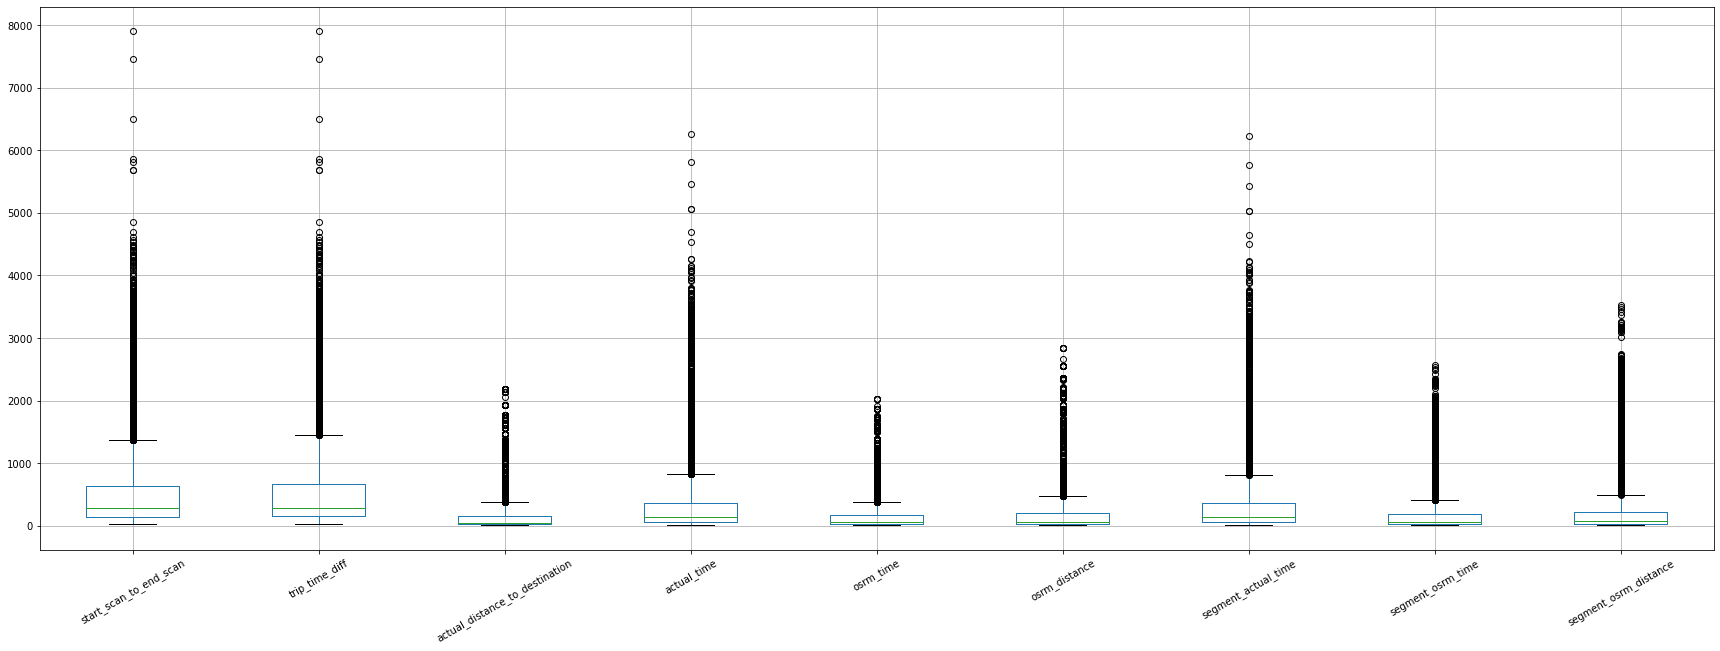

In [49]:
num_cols = ['start_scan_to_end_scan', 'trip_time_diff', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
trip[num_cols].boxplot(rot = 30, figsize=(30, 10))
plt.show()